In [1]:
import numpy as np
from michigrad2.michigrad.visualize import show_graph
from michigrad2.michigrad.engine import Value
from michigrad2.michigrad.nn import Module, Neuron, Layer, MLP

In [17]:
np.random.seed(41)  
modelo = MLP(2, [(2, "Tanh"), (2, "Sigmoid"), (1,)] )
for layer in modelo.layers:
    for n in layer.neurons:
        n.nonlin = False


xs = [[0,0],[0,1],[1,0],[1,1]]
ys = [0,1 , 1, 0]
yHats = [modelo(x)[0] for x in xs]
yHats

[(2,), (2, 'Tanh'), (2, 'Sigmoid'), (1,)]


[Value(data=0.16199004327704702, grad=0, name=),
 Value(data=0.23115871771927307, grad=0, name=),
 Value(data=0.13258868123479478, grad=0, name=),
 Value(data=0.20859024367721354, grad=0, name=)]

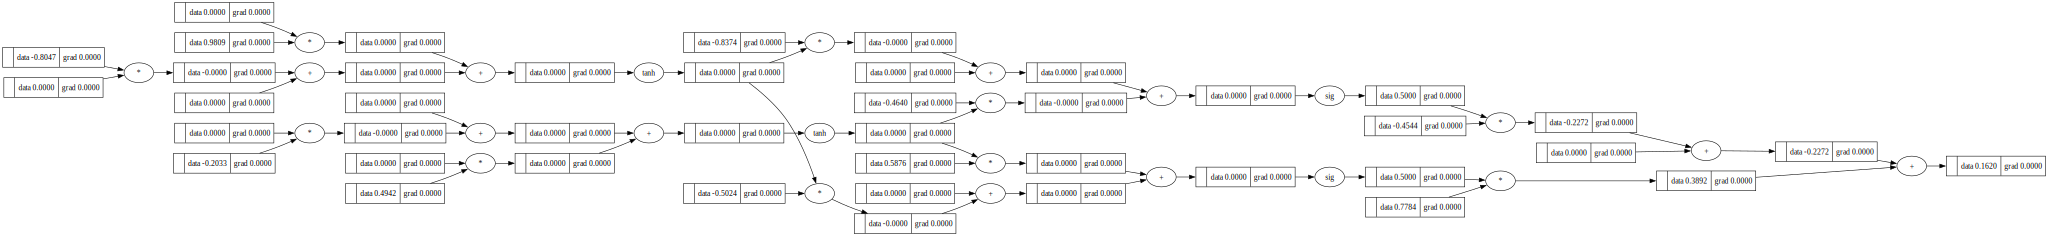

In [18]:
show_graph(yHats[0])

In [21]:
lr = 0.01
step = 10000
resultados = []
for _ in range(step):
    yHats = [modelo(x)[0] for x in xs]
    loss = sum([(y-yhat)**2 for y,yhat, in zip(ys, yHats)])/4
    for p in modelo.parameters():
        p.grad = 0
    
    loss.backward()
    resultados.append(loss.data)
    for p in modelo.parameters():
        p.data -= p.grad*lr

loss

Value(data=9.636854211044068e-19, grad=1, name=)

In [22]:
xs = [[0,0],[0,1],[1,0],[1,1]]
print(modelo(xs[0]),modelo(xs[1]),modelo(xs[2]),modelo(xs[3]))

[Value(data=1.76241521376852e-09, grad=0, name=)] [Value(data=0.999999999552794, grad=0, name=)] [Value(data=0.9999999995150202, grad=0, name=)] [Value(data=-5.506669564780964e-10, grad=0, name=)]
